In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
# library for train test split
from sklearn.model_selection import train_test_split
# deep learning libraries for text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Modeling 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Flatten, Dropout, LSTM, Bidirectional

In [ ]:
url = 'https://raw.githubusercontent.com/krishnasudan909/MLDL_CP_DATASET/main/dataset'
messages = pd.read_csv(url, sep ='\t',names=["label", "message"])
messages[:3]

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,free 🆓 entry in 2 a wkly comp to win FA cu...


In [ ]:
messages.describe()

,label,message
count,5572,5572
unique,2,5171
top,ham,"Sorry, I'll call 🤙 later"
freq,4825,30


In [ ]:
duplicatedRow = messages[messages.duplicated()]
print(duplicatedRow[:5])

    label                                            message
103   ham  As per your request 'Melle Melle (Oru Minnamin...
154   ham  As per your request 'Melle Melle (Oru Minnamin...
207   ham  As I entered my cabin my PA said, '' happy  😊 ...
223   ham                          Sorry, I'll call 🤙  later
326   ham        No call 🤙 s..message  📩  s..missed call 🤙 s


In [ ]:
messages.groupby('label').describe().T

label                                 ham  \
message count                        4825   
        unique                       4516   
        top     Sorry, I'll call 🤙  later   
        freq                           30   

label                                                        spam  
message count                                                 747  
        unique                                                655  
        top     Please call 🤙  our customer service representa...  
        freq                                                    4

In [ ]:
try:
    import cPickle as pickle
except ImportError: 
    import pickle
import re

with open('Emoji_Dict.p', 'rb') as fp:
    Emoji_Dict = pickle.load(fp)
Emoji_Dict = {v: k for k, v in Emoji_Dict.items()}

def convert_emojis_to_word(text):
    for emot in Emoji_Dict:
        text = re.sub(r'('+emot+')', "_".join(Emoji_Dict[emot].replace(",","").replace(":","").split()), text)
    return text

In [ ]:
ham_msg = messages[messages.label =='ham']
spam_msg = messages[messages.label=='spam']
ham_msg_text = " ".join(ham_msg.message.to_numpy().tolist())
ham_msg_text = convert_emojis_to_word(ham_msg_text)
spam_msg_text = " ".join(spam_msg.message.to_numpy().tolist())
spam_msg_text = convert_emojis_to_word(spam_msg_text)

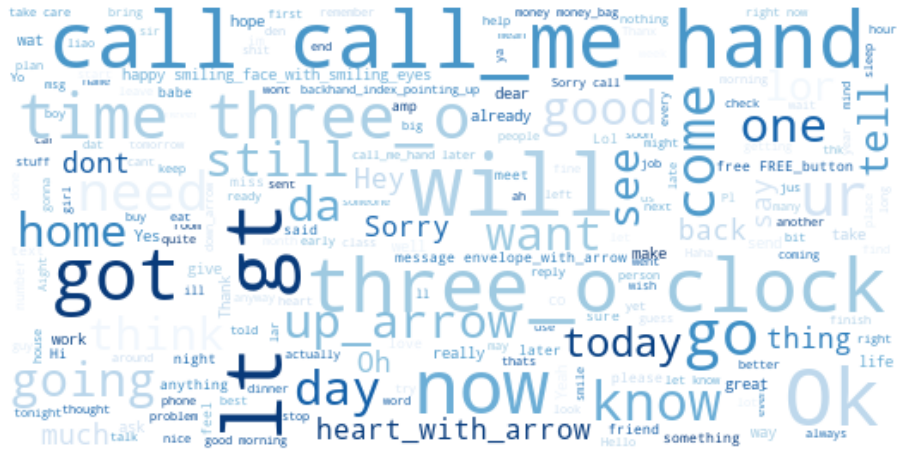

In [ ]:
ham_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="white", colormap='Blues').generate(ham_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(ham_msg_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

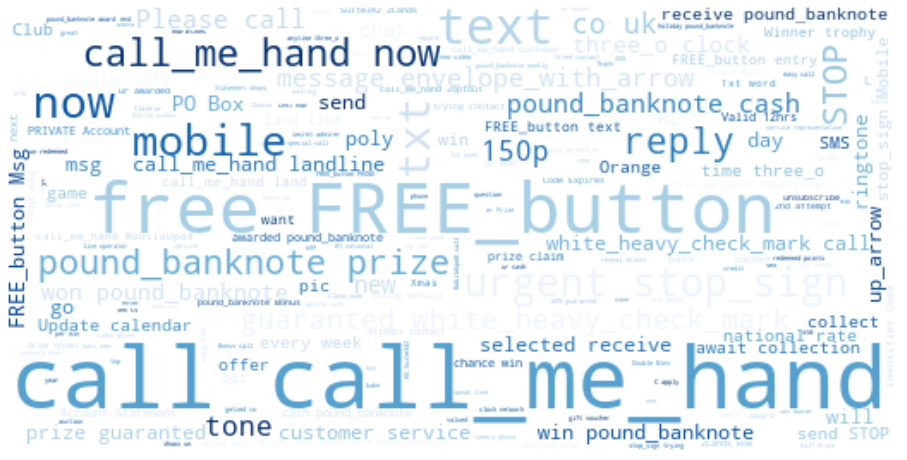

In [ ]:
spam_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="white", colormap='Blues').generate(spam_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(spam_msg_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


15.481865284974095

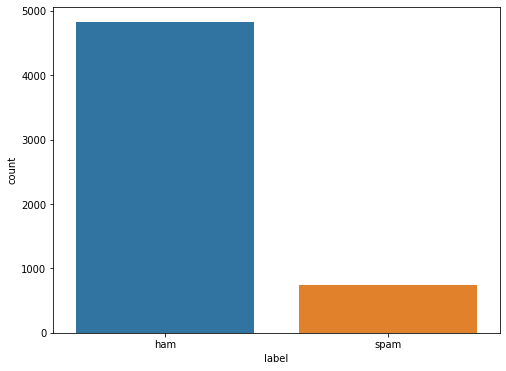

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(messages.label)
# Percentage of spam messages
(len(spam_msg)/len(ham_msg))*100

In [ ]:
ham_msg_df = ham_msg.sample(n = len(spam_msg), random_state = 44)
spam_msg_df = spam_msg
print(ham_msg_df.shape, spam_msg_df.shape)

(747, 2) (747, 2)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Message types')

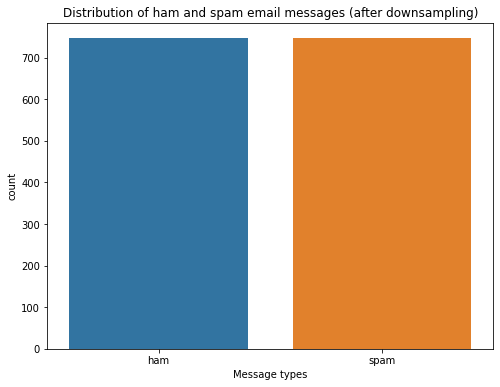

In [ ]:
msg_df = ham_msg_df.append(spam_msg_df).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.countplot(msg_df.label)
plt.title('Distribution of ham and spam email messages (after downsampling)')
plt.xlabel('Message types')

In [ ]:
msg_df['text_length'] = msg_df['message'].apply(len)
labels = msg_df.groupby('label').mean()
labels

,text_length
label,
ham,74.330656
spam,145.637216


In [ ]:
msg_df['msg_type']= msg_df['label'].map({'ham': 0, 'spam': 1})
msg_label = msg_df['msg_type'].values
train_msg, test_msg, train_labels, test_labels = train_test_split(msg_df['message'], msg_label, test_size=0.2, random_state=434)

In [ ]:
max_len = 50 
trunc_type = "post" 
padding_type = "post" 
oov_tok = "<OOV>" 
vocab_size = 500

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, char_level=False, oov_token = oov_tok)
tokenizer.fit_on_texts(train_msg)
text_to_sequence = tokenizer.texts_to_sequences(train_msg)

In [ ]:
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'call': 5,
 '🤙': 6,
 'i': 7,
 'the': 8,
 'u': 9,
 'your': 10,
 'for': 11,
 '💷': 12,
 '🆓': 13,
 'free': 14,
 'is': 15,
 '2': 16,
 'and': 17,
 'now': 18,
 'or': 19,
 'in': 20,
 'on': 21,
 'ur': 22,
 'have': 23,
 '4': 24,
 'txt': 25,
 'of': 26,
 'are': 27,
 'with': 28,
 'me': 29,
 'from': 30,
 'text': 31,
 'get': 32,
 'my': 33,
 'it': 34,
 'stop': 35,
 'just': 36,
 'mobile': 37,
 'this': 38,
 'will': 39,
 'be': 40,
 'no': 41,
 'that': 42,
 'claim': 43,
 'reply': 44,
 'can': 45,
 'so': 46,
 'send': 47,
 'www': 48,
 'we': 49,
 'only': 50,
 'our': 51,
 'not': 52,
 'out': 53,
 'at': 54,
 'do': 55,
 'if': 56,
 'prize': 57,
 '🕒': 58,
 'new': 59,
 'go': 60,
 'msg': 61,
 'cash': 62,
 'but': 63,
 '1': 64,
 '150p': 65,
 'uk': 66,
 'nokia': 67,
 'who': 68,
 't': 69,
 'all': 70,
 'win': 71,
 'please': 72,
 'phone': 73,
 'won': 74,
 'up': 75,
 'tone': 76,
 'when': 77,
 "i'm": 78,
 'week': 79,
 'been': 80,
 'what': 81,
 '⬆️': 82,
 '50': 83,
 'com': 84,
 'time

In [ ]:
tot_words = len(word_index)
print('There are %s unique tokens in training data. ' % tot_words)


There are 4189 unique tokens in training data. 


In [ ]:
training_sequences = tokenizer.texts_to_sequences(train_msg)
training_padded = pad_sequences (training_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type )
testing_sequences = tokenizer.texts_to_sequences(test_msg)
testing_padded = pad_sequences(testing_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type)

In [ ]:
print('Shape of training tensor: ', training_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape)

Shape of training tensor:  (1195, 50)
Shape of testing tensor:  (299, 50)


In [ ]:
# Before padding
len(training_sequences[0]), len(training_sequences[1])

(32, 25)

In [ ]:
# After padding
len(training_padded[0]), len(training_padded[1])

(50, 50)

In [ ]:
print(training_padded[0])

[  1  50 194  10  37   1   3  27   1   2 285 205   2   8 161 286 144  37
  11  14  13   5   6   8  37 285 205  94  14  13  21   1   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


# Dense Model

In [ ]:
vocab_size = 500
embeding_dim = 16
drop_value = 0.2
n_dense = 24

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            8000      
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
______________________________________________________

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [ ]:
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(training_padded, train_labels, epochs=num_epochs, validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)

Epoch 1/30
38/38 - 5s - loss: 0.6875 - accuracy: 0.7130 - val_loss: 0.6779 - val_accuracy: 0.8629 - 5s/epoch - 129ms/step
Epoch 2/30
38/38 - 0s - loss: 0.6600 - accuracy: 0.8653 - val_loss: 0.6383 - val_accuracy: 0.8629 - 261ms/epoch - 7ms/step
Epoch 3/30
38/38 - 0s - loss: 0.6029 - accuracy: 0.8736 - val_loss: 0.5641 - val_accuracy: 0.8696 - 256ms/epoch - 7ms/step
Epoch 4/30
38/38 - 0s - loss: 0.5109 - accuracy: 0.8862 - val_loss: 0.4649 - val_accuracy: 0.8696 - 232ms/epoch - 6ms/step
Epoch 5/30
38/38 - 0s - loss: 0.4055 - accuracy: 0.9021 - val_loss: 0.3761 - val_accuracy: 0.8796 - 337ms/epoch - 9ms/step
Epoch 6/30
38/38 - 0s - loss: 0.3223 - accuracy: 0.9105 - val_loss: 0.3258 - val_accuracy: 0.8763 - 303ms/epoch - 8ms/step
Epoch 7/30
38/38 - 0s - loss: 0.2687 - accuracy: 0.9180 - val_loss: 0.2683 - val_accuracy: 0.8963 - 390ms/epoch - 10ms/step
Epoch 8/30
38/38 - 0s - loss: 0.2268 - accuracy: 0.9297 - val_loss: 0.2316 - val_accuracy: 0.9097 - 306ms/epoch - 8ms/step
Epoch 9/30
38/38

In [ ]:
model.evaluate(testing_padded, test_labels)

10/10 [==============================] - 0s 8ms/step - loss: 0.1191 - accuracy: 0.9532


[0.11909916251897812, 0.953177273273468]

In [ ]:
metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

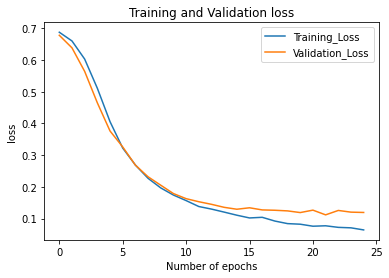

In [ ]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')

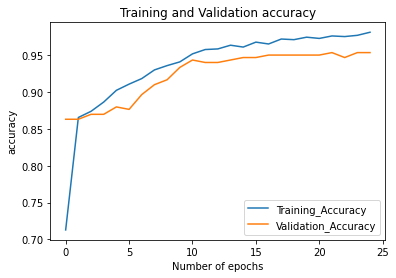

In [ ]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

# LSTM

In [ ]:
max_length_sequence = max([len(i) for i in text_to_sequence])
 #finding the length of largest sequence
padded_sms_sequence = pad_sequences(text_to_sequence, maxlen=max_length_sequence, 
                                    padding = "pre") 
padded_sms_sequence

array([[  0,   0,   0, ...,  13,  21,   1],
       [  0,   0,   0, ...,   1,  12, 287],
       [  0,   0,   0, ...,  20,   2, 259],
       ...,
       [  0,   0,   0, ...,  35,   2,   1],
       [  0,   0,   0, ...,   1,   1,   1],
       [  0,   0,   0, ..., 119,  56,   1]], dtype=int32)

In [ ]:
TOT_SIZE = len(tokenizer.word_index)+1
def create_model():
    
      lstm_model = Sequential()
      lstm_model.add(Embedding(TOT_SIZE, 32, input_length=max_length_sequence))
      lstm_model.add(LSTM(100))
      lstm_model.add(Dropout(0.4))
      lstm_model.add(Dense(20, activation="relu"))
      lstm_model.add(Dropout(0.3))
      lstm_model.add(Dense(1, activation = "sigmoid"))
      return lstm_model
lstm_model = create_model()
lstm_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [ ]:
lstm_model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 193, 32)           134080    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 20)                2020      
                                                                 
 dropout_2 (Dropout)         (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 189,321
Trainable params: 189,321
Non-tr

In [ ]:
history = lstm_model.fit(padded_sms_sequence, train_labels, epochs = 5, validation_split=0.2, batch_size=16, )

Epoch 1/5
60/60 [==============================] - 14s 148ms/step - loss: 0.5989 - accuracy: 0.6893 - val_loss: 0.3324 - val_accuracy: 0.8661
Epoch 2/5
60/60 [==============================] - 10s 163ms/step - loss: 0.2658 - accuracy: 0.9121 - val_loss: 0.2252 - val_accuracy: 0.9038
Epoch 3/5
60/60 [==============================] - 8s 137ms/step - loss: 0.1182 - accuracy: 0.9676 - val_loss: 0.1746 - val_accuracy: 0.9414
Epoch 4/5
60/60 [==============================] - 8s 136ms/step - loss: 0.1028 - accuracy: 0.9676 - val_loss: 0.1435 - val_accuracy: 0.9456
Epoch 5/5
60/60 [==============================] - 8s 135ms/step - loss: 0.0720 - accuracy: 0.9812 - val_loss: 0.1757 - val_accuracy: 0.9498


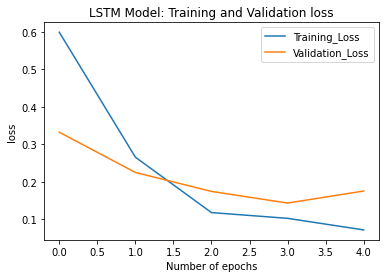

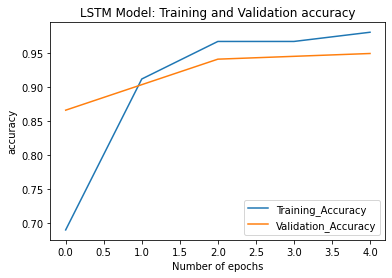

In [ ]:
metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [ ]:
import pickle
pickle.dump(tokenizer, open("sms_spam_tokenizer.pkl", "wb"))
pickle.dump(lstm_model, open("lstm_model.pkl", "wb"))

INFO:tensorflow:Assets written to: ram://31ad3651-a9f7-4814-a419-c27d72332f9c/assets


INFO:tensorflow:Assets written to: ram://31ad3651-a9f7-4814-a419-c27d72332f9c/assets


# BI-LSTM

In [ ]:
Bilstm_model = Sequential()
Bilstm_model.add(Embedding(TOT_SIZE, 32, input_length=max_length_sequence))
Bilstm_model.add(Bidirectional(LSTM(100)))
Bilstm_model.add(Dropout(0.4))
Bilstm_model.add(Dense(20, activation="relu"))
Bilstm_model.add(Dropout(0.3))
Bilstm_model.add(Dense(1, activation = "sigmoid"))

In [ ]:
Bilstm_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [ ]:
history = Bilstm_model.fit(padded_sms_sequence, train_labels, epochs = 5, validation_split=0.2, batch_size=16)

Epoch 1/5
60/60 [==============================] - 18s 218ms/step - loss: 0.5657 - accuracy: 0.7322 - val_loss: 0.2758 - val_accuracy: 0.9079
Epoch 2/5
60/60 [==============================] - 12s 203ms/step - loss: 0.1903 - accuracy: 0.9341 - val_loss: 0.1732 - val_accuracy: 0.9414
Epoch 3/5
60/60 [==============================] - 12s 202ms/step - loss: 0.1210 - accuracy: 0.9665 - val_loss: 0.1479 - val_accuracy: 0.9456
Epoch 4/5
60/60 [==============================] - 12s 203ms/step - loss: 0.1055 - accuracy: 0.9738 - val_loss: 0.1553 - val_accuracy: 0.9456
Epoch 5/5
21/60 [=========>....................] - ETA: 7s - loss: 0.0931 - accuracy: 0.9762

In [ ]:
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('BiLSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
# Plot
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [ ]:
pickle.dump(Bilstm_model, open("model.pkl", "wb"))

INFO:tensorflow:Assets written to: ram://287b90af-6a0c-48c2-ae39-782c70700fdd/assets


INFO:tensorflow:Assets written to: ram://287b90af-6a0c-48c2-ae39-782c70700fdd/assets
